# Laboratorio: Eliminación de anomalías y ajuste de intensidad en imágenes.

## Objetivo

> El objetivo de esta actividad es familiarizarnos con las técnicas de eliminación de anomalías y de ajuste de intensidad. Al finalizar la actividad serás capaz de seleccionar la mejor técnica para eliminar anomalías, así como aplicar diversas técnicas de ajuste de intensidad.

### Descripción de la actividad

#### 1. Eliminación de anomalías:
    - Selecciona dos imágenes.
    - Agrega ruido de sal y pimienta o alguna otra anomalía.
    - Selecciona dos técnicas para eliminar el ruido o la anomalía presentada (una con desarrollo propio y otra de OpenCV).
    - Realiza pruebas con las dos técnicas.
    - Identifica una medida de desempeño cuantitativa que te permita seleccionar la mejor imagen con los mejores parámetros (utiliza la imagen original).
    - Compara y concluye.

#### 2.	Ajuste de intensidad:
    - Selecciona dos imágenes que requieran una mejora de contraste.
    - Aplica dos técnicas que permitan mejorar el contraste (una con desarrollo propio y otra de OpenCV).
    - Aplica las dos técnicas a las dos imágenes.
    - Describe como seleccionaste la mejor técnica para el ajuste de intensidad.
    - Describe características de las técnicas seleccionadas.
    - Compara y concluye.


Implementa tu solución en notebook de Python que describirá Los pasos implementados. El notebook deberá incluir los puntos mencionados anteriormente.

Los algoritmos propuestos no deben ser ad hoc, sino que debe poder extrapolarse a otras imágenes. Para la solución aportada incluye un desarrollo propio y otro de la biblioteca de OpenCV, tanto para la eliminación de anomalías como para la mejora de intensidad. La solución aportada no debe ser básica: repetición de una solución bien conocida o existente en una librería. Se pueden utilizar funcionalidades proporcionadas por las librerías, pero la implementación de la operación principal debe ser propia. No se permite copiar código de Internet. En caso de que se reutilicen ideas deberá referenciarse la fuente.

##### Extensión máxima

La extensión máxima permitida en esta actividad es de seis páginas.

##### Formato de entrega

Comenta todos los resultados obtenidos y exporta el notebook a un fichero con extensión .pdf, comenta todos los puntos que se solicitan. Es importante asegurarse de que la visualización es correcta y todos los apartados del ejercicio son legibles (se puede obtener directamente desde los notebooks «imprimiendo» en PDF).

#### Rúbrica

|Eliminación de anomalías y ajuste de intensidad en imágenes|Descripción|Puntuación máxima(puntos)|Peso%|
|-----|------|-----|------|
|Criterio 1|Utiliza dos técnicas (una de desarrollo propio y otra de OpenCV) para la eliminación de anomalías.|2|20%|
|Criterio 2|Utiliza dos técnicas (una de desarrollo propio y otra de OpenCV) para el ajuste de intensidad.|2|20%|
|Criterio 3|Identifica una medida de desempeño en el caso de anomalías, compara y concluye.|1|10%|
|Criterio 4|Describe la manera de seleccionar la mejor técnica para la mejora de intensidad, describe, compara y concluye.|1|10%|
|Criterio 5|El notebook ejecuta correctamente y muestra los resultados de los principales pasos.|2|20%|
|Criterio 6|Incluye todos los puntos anteriores en el reporte.|2|20%|
|Criterio 7|Existe plagio no debidamente referenciado o el trabajo es similar y con los mismos puntos de fallo que el de otro compañero.|-10|-100%|
|||10|100 %|


### Importamos las librerias necesarias en la actividad

In [73]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity
import pandas as pd

### Definimos una función para mostrar la imagen usando matplotlib.

```
Esta función muestra una imagen abierta por opencv.
    imagen: Imagen abierta en opencv
    titulo: Titulo opcional de la imagen
mostrar_imagen(imagen)
```

In [74]:
def mostrar_imagen(imagen, titulo = 'Imagen'):
    plt.imshow(imagen, cmap = 'gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

### Abrimos imagenes originales en escala de grises y las guardamos en una variable que buscaremos que sea inmutable.

In [75]:
original_windows_xp_wallpaper = cv.imread('./imagenes/windows_xp_wallpaper.jpg', cv.IMREAD_GRAYSCALE);

if original_windows_xp_wallpaper is None:
    print('No se pudo abrir la imagen')

### Definimos una función para agregar ruido sal y pimienta

```
Esta función agrega ruido sal y pimienta a la imagen.
    imagen: Objeto abierto con cv2.imread
    porcentaje: el porcentaje de ruido que se le agregará a la imagen. Default 0.1 = 10%. 50% del porcentaje sera para sal y el otro 50% será para pimienta.
    return: imagen con ruido.
agregar_ruido_sal_y_pimienta(imagen, porcentaje=0.1)
```

In [76]:
def agregar_ruido_sal_y_pimienta(imagen, porcentaje = 0.1):
    imagen_con_ruido = imagen.copy()
    total_ruido = int(porcentaje * imagen_con_ruido.size / 2)

    # Añadimos sal
    pixeles_con_sal = [np.random.randint(0, i - 1, total_ruido) for i in imagen.shape]
    imagen_con_ruido[pixeles_con_sal[0], pixeles_con_sal[1]] = 255

    # Añadimos sal
    pixeles_con_pimienta = [np.random.randint(0, i - 1, total_ruido) for i in imagen.shape]
    imagen_con_ruido[pixeles_con_pimienta[0], pixeles_con_pimienta[1]] = 0

    return imagen_con_ruido

### Generamos una imagen con ruido sal y pimienta al 10% usando la imagen original.

In [116]:
windows_xp_wallpaper_con_ruido = agregar_ruido_sal_y_pimienta(original_windows_xp_wallpaper, 0.05)

### Mostramos la imagen original e imagen con ruido sal y pimienta

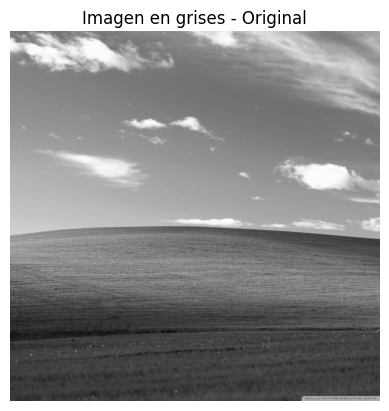

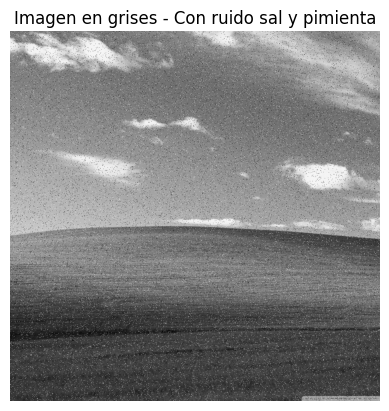

In [117]:
mostrar_imagen(original_windows_xp_wallpaper, 'Imagen en grises - Original')
mostrar_imagen(windows_xp_wallpaper_con_ruido, 'Imagen en grises - Con ruido sal y pimienta')

### Usando OpenCV quitamos el ruido sal y pimienta - Metodo de Mediana

Este metodo, existente en la libreria opencv, ayuda a suavizar la imagen sin perder los detalles como los bordes. El filtro trabaja reemplazando cada pixel con la mediana de sus vecinos. Funciona eficientemente con el ruido de sal y pimienta.

```
inputArray: Imagen abierta por opencv
ksize: Debe de ser un entero impar, entre mas grande, mas suaviza la imagen, pero se pueden perder mas detalles.
```

In [118]:
windows_xp_wallpaper_filtrada_opencv = cv.medianBlur(windows_xp_wallpaper_con_ruido, ksize = 3)

### Usando una implementación propia: Filtro Kuwahara
Este filtro funciona seleccionando una ventana cuadrada alrededor de cada uno de los pixeles.
La ventana la dividiremos en 4 cuadrantes superpuestas, dado que cada región contendrá al pixel central.
Para cada región calcularemos la media y la varianza.
Al final elegiremos el cuadrante con la menor varianza, la que está mas uniforme.
El pixel central se reemplaza por la media del cuadrante seleccionado.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Kuwahara.jpg/200px-Kuwahara.jpg)

```
Esta función nos quitará el ruido de sal y pimienta usando el filtro Kuwahara.
    imagen: Una imagen abierta con opencv.
    tamanio_ventana: El tamaño total de la ventana. Debe de ser un numero impar. Dado que tamanio_ventana es igual a 2a + 1, donde "a" es un numero positivo mayor que 0. Esto asegura que siempre sea un numero impar. Valor default = 5.
        Ejemplo: a=1 entonces 2(1) + 1 = 3.
        Ejemplo: a=2 entonces 2(2) + 1 = 5
    return: Una nueva imagen filtrada.
kuwahara_filter(imagen, tamanio_ventana = 5)
```

[https://en.wikipedia.org/wiki/Kuwahara_filter](https://en.wikipedia.org/wiki/Kuwahara_filter)

In [119]:
def kuwahara_filter(imagen, tamanio_ventana = 5):
    # Obtenemos un tamaño para cada uno de los cuadrantes.
    tamanio_cuadrante = tamanio_ventana // 2

    # Generamos una nueva imagen agregando bordes a cada lado de la imagen con ruido.
    # Los bordes se generan con el objetivo de que cada uno de los pixeles de nuestra imagen con ruido, se pueda seleccionar una ventana para obtener los cuadrantes.
    # Le pasamos la imagen, luego pasamos el tamaño que tendrá de borde a cada lado (top, bottom, left, right) y al final definimos como vamos a generar este border. BORDER_REFLECT refleja los pixeles que se tienen en la imagen. Ejemplo: cba|abcdefg|gfe
    imagen_con_borde = cv.copyMakeBorder(imagen, tamanio_cuadrante, tamanio_cuadrante, tamanio_cuadrante, tamanio_cuadrante, cv.BORDER_REFLECT)

    # Generamos un arreglo bidimensional del mismo tamaño de la imagen de entrada. Se inicializa en 0.
    imagen_filtrada = np.zeros_like(imagen)

    # Obtenemos las filas y columnas de nuestra imagen con ruido.
    filas, columnas = imagen.shape

    # Recorremos fila por fila y columna por columna nuestra imagen.
    for i in range(filas):
        for j in range(columnas):
            # Obtenemos nuestra ventana usando la imagen con bordes.
            ventana = imagen_con_borde[i: i + tamanio_ventana, j: j + tamanio_ventana]

            #Dividimos nuestra ventana en los 4 cuadrantes que necesitamos.
            cuadrantes = [
                ventana[0: tamanio_cuadrante + 1, 0: tamanio_cuadrante + 1], # Cuadrante 1
                ventana[0: tamanio_cuadrante + 1, tamanio_cuadrante:],       # Cuadrante 2
                ventana[tamanio_cuadrante:, 0: tamanio_cuadrante],           # Cuadrante 3
                ventana[tamanio_cuadrante:, tamanio_cuadrante:]              # Cuadrante 4
            ]

            # Calculamos las medias y las varianzas de cada uno de los cuadrantes.
            medias_cuadrantes = [np.mean(cuadrante) for cuadrante in cuadrantes]
            varianza_cuadrantes = [np.var(cuadrante) for cuadrante in cuadrantes]

            # Buscamos el cuadrante con menor varianza
            indice_menor_varianza = np.argmin(varianza_cuadrantes)

            # Se guarda la media del cuadrante con menor varianza en el arreglo bidimensional. La media se convierte a entero, por si tenemos valor decimales.
            imagen_filtrada[i, j] = int(medias_cuadrantes[indice_menor_varianza])

    # Al final retornamos la imagen filtrada
    return imagen_filtrada

In [120]:
windows_xp_wallpaper_filtrada_manual = kuwahara_filter(windows_xp_wallpaper_con_ruido, 7)

### Mostramos las imagenes filtradas

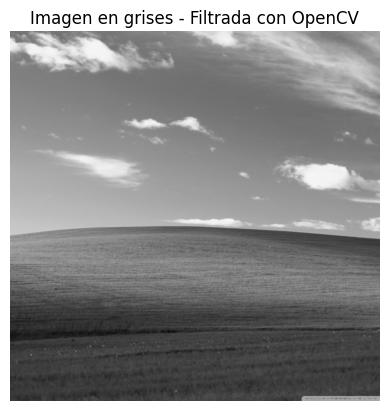

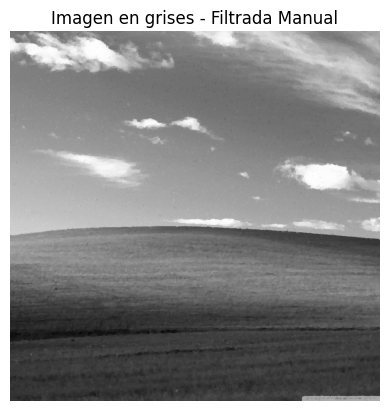

In [121]:
mostrar_imagen(windows_xp_wallpaper_filtrada_opencv, 'Imagen en grises - Filtrada con OpenCV')
mostrar_imagen(windows_xp_wallpaper_filtrada_manual, 'Imagen en grises - Filtrada Manual')

### Calculamos las diferencias entre las imagenes filtradas y la imagen original

Para hacer esto, usaremos tres metricas:
1. **MSE (Mean Squared Error):**
    - Con esto vamos a calcular el promedio de los errores al cuadrado por cada pixel. Entre mas bajo, es mejor (Hay menos diferencia).
2. **SSIM (Indice de similitud estructural):**
    - Con esto vamos a medir la similitud perceptual entre las dos imagenes (original y filtrada). Se considerará Estructura, Luminicencia y Contraste. La escala va del 0 al 1, donde 1 = Idénticas.
3. **PSNR (Peak Signal-to-Noise Ratio):**
    - Con esto vamos a medir la calidad de la imagen restaurada comparada con la original. Cuanto mas alto, es mejor (Existe menos diferencia entre la imagen limpia y la filtrada). La escala es tipicamente entre 30 y  50 dB. >40 dB se considera excelente.

### Definimos unas funciones que nos ayudaran a calcular las diferentes metricas

```
Calcula el MSE.
calcular_mse(imagen_original, imagen_filtrada)

Calcular el SSIM
calcular_ssim(imagen_original, imagen_filtrada)

Calcula el psnr
calcular_psnr(imagen_original, imagen_filtrada)

Parametros:
    imagen_original: imagen original en escala de grises abierta por opencv.
    imagen_filtrada: imagen filrada por alguno de los metodos usados anteriormente.

    return: el valor de cada función.
```

In [122]:
def calcular_mse(imagen_original, imagen_filtrada):
    return np.mean((imagen_original.astype(np.float64) - imagen_filtrada.astype(np.float64)) ** 2)

def calcular_ssim(imagen_original, imagen_filtrada):
    valor_ssim, _ = structural_similarity(imagen_original, imagen_filtrada, full = True)
    return valor_ssim

def calcular_psnr(imagen_original, imagen_filtrada):
    return cv.PSNR(imagen_original, imagen_filtrada)

### Calculamos las metricas para cada una de las imagenes.

In [123]:
metricas = {
    "Filtrada_OpenCV_vs_Original": {
        "MSE": calcular_mse(original_windows_xp_wallpaper, windows_xp_wallpaper_filtrada_opencv),
        "SSIM": calcular_ssim(original_windows_xp_wallpaper, windows_xp_wallpaper_filtrada_opencv),
        "PSNR": calcular_psnr(original_windows_xp_wallpaper, windows_xp_wallpaper_filtrada_opencv)
    },
    "Filtrada_Manual_vs_Original": {
        "MSE": calcular_mse(original_windows_xp_wallpaper, windows_xp_wallpaper_filtrada_manual),
        "SSIM": calcular_ssim(original_windows_xp_wallpaper, windows_xp_wallpaper_filtrada_manual),
        "PSNR": calcular_psnr(original_windows_xp_wallpaper, windows_xp_wallpaper_filtrada_manual)
    }
}
print(metricas)

{'Filtrada_OpenCV_vs_Original': {'MSE': np.float64(8.70742416381836), 'SSIM': np.float64(0.9509453428900735), 'PSNR': 38.73190660152639}, 'Filtrada_Manual_vs_Original': {'MSE': np.float64(43.29970073699951), 'SSIM': np.float64(0.7738136771872433), 'PSNR': 31.76595466101586}}


In [124]:
df_metricas = pd.DataFrame(metricas).T

### Conclusión.

El filtro de Kuwahara se enfoca mas en conservar los bordes. Se utiliza más cuando la imagen tiene poco ruido y quieres preservar detalles, pero no funciona bien en imagenes donde el ruido está focalizado o es un ruido muy fuerte. En los casos de sal y pimienta no filtra lo suficiente por lo tanto en las metricas, comparado contra el filtro de mediana, salió perdiendo.

En el caso del filtro de mediana, es un filtro especialmente diseñado para ruido de sal y pimienta, ya que podemos ver en las metricas que el filtro de mediana deja menos error residual, no se aleja tanto del original y su PSNR es excelente.

Por lo tanto, para ruidos de sal y pimienta, la mejor opcion es el filtro de mediana.
Kuwahara seria util para casos donde se quiere preservar los bordes y suavizar detalles sin ruido fuerte.

In [125]:
df_metricas

,MSE,SSIM,PSNR
Filtrada_OpenCV_vs_Original,8.707424,0.950945,38.731907
Filtrada_Manual_vs_Original,43.299701,0.773814,31.765955
